<a href="https://colab.research.google.com/github/atik666/attentionModel/blob/cloab/UNetSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#!pip install segmentation-models
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
from skimage.io import imread, imshow
import cv2

In [3]:
data = np.load("/content/drive/MyDrive/Colab/encoder/cwtX.npy")
label = np.load("/content/drive/MyDrive/Colab/encoder/X.npy")
y = np.load("/content/drive/MyDrive/Colab/encoder/y.npy")

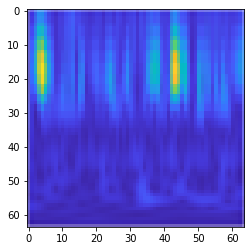

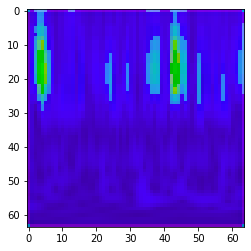

In [4]:
image_x = random.randint(0, len(data))

img = cv2.cvtColor(data[image_x], cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

lbl = cv2.cvtColor(label[image_x], cv2.COLOR_BGR2RGB)
plt.imshow(lbl)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, _, _ = train_test_split(data, y, test_size = 0.20, random_state = 0, stratify=y)
y_train, y_test, _, _ = train_test_split(label, y, test_size = 0.20, random_state = 0, stratify=y)

In [6]:
#Build the model
inputs = tf.keras.layers.Input((64, 64, 3))

c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(3, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()

In [7]:
results = model.fit(x_train, y_train, validation_split=0.1, batch_size=64, epochs=50)

Epoch 1/50
23/23 [==============================] - 38s 166ms/step - loss: 0.4505 - accuracy: 0.9540 - val_loss: 0.4067 - val_accuracy: 0.9861
Epoch 2/50
23/23 [==============================] - 3s 111ms/step - loss: 0.3985 - accuracy: 0.9825 - val_loss: 0.3856 - val_accuracy: 0.9857
Epoch 3/50
23/23 [==============================] - 3s 111ms/step - loss: 0.3842 - accuracy: 0.9847 - val_loss: 0.3769 - val_accuracy: 0.9878
Epoch 4/50
23/23 [==============================] - 3s 110ms/step - loss: 0.3776 - accuracy: 0.9869 - val_loss: 0.3732 - val_accuracy: 0.9894
Epoch 5/50
23/23 [==============================] - 3s 111ms/step - loss: 0.3734 - accuracy: 0.9887 - val_loss: 0.3704 - val_accuracy: 0.9911
Epoch 6/50
23/23 [==============================] - 3s 112ms/step - loss: 0.3703 - accuracy: 0.9901 - val_loss: 0.3679 - val_accuracy: 0.9931
Epoch 7/50
23/23 [==============================] - 3s 112ms/step - loss: 0.3680 - accuracy: 0.9911 - val_loss: 0.3662 - val_accuracy: 0.9940
Epoch

In [8]:
preds_test = model.predict(x_test, verbose=1)

13/13 [==============================] - 1s 54ms/step


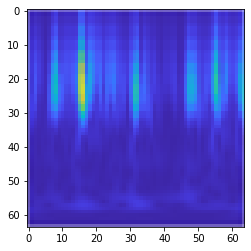

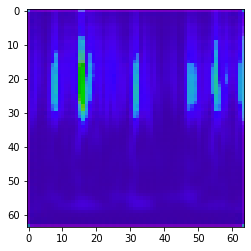

In [18]:
preds_test.shape

image_x = random.randint(0, len(preds_test))

img = cv2.cvtColor(x_test[image_x], cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

img = cv2.cvtColor(preds_test[image_x], cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()